In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from itertools import cycle
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import warnings
from sklearn import metrics
from collections import Counter
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("Thessaloniki_data.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df

,"Διεύθυνση κατοικίας (Οδός, αριθμός, TK)","Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).",Φύλλο,Ηλικία,Δίπλωμα οδήγησης,Δίπλωμα μηχανής,Ποδήλατο,Πατίνι,Απο πόσα άτομα αποτελείται η οικογένειά σας ? (Να αναγράψετε αριθμό),Πόσα ιδιωτικά οχήματα διαθέτετε στην οικογένειά σας? (Να αναγράψετε αριθμό),...,Αναφέρετε πόσα λεπτά στο περίπου χρειάζεστε για να μεταβέιτε από το σπίτι σας προς τον χώρο εργασίας σας.,Ποιές ώρες πηγαίνετε συνήθως στην εργασία σας?,Άνεση μετακίνησης,Κόστος μετακίνησης,Ασφάλεια μετακίνησης,Προστασία του περιβάλλοντος,Σωματική άσκηση και υγεία,Καιρικές συνθήκες,Διαθεσημότητα χώρου στάθμευσης,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,...,60,09.00 - 12.00,1,3,2,4,5,3,4,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,40,06.00 - 09.00,4,4,4,2,2,2,3,7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,35,06.00 - 09.00,4,5,3,2,1,4,2,6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,...,6,06.00 - 09.00,5,3,3,3,3,5,3,0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,...,46,06.00 - 09.00,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,...,18,12.00 - 15.00,5,3,5,3,3,3,5,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,...,60,09.00 - 12.00,3,5,3,5,3,3,3,9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,...,44,06.00 - 09.00,4,3,3,4,5,5,3,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,...,18,12.00 - 15.00,4,5,3,4,3,3,3,2.20


In [5]:
print(df.columns)

Index(['Διεύθυνση κατοικίας (Οδός, αριθμός, TK)',
       'Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).',
       'Φύλλο', 'Ηλικία', 'Δίπλωμα οδήγησης', 'Δίπλωμα μηχανής', 'Ποδήλατο',
       'Πατίνι',
       'Απο πόσα άτομα αποτελείται η οικογένειά σας ?  (Να αναγράψετε αριθμό)',
       'Πόσα ιδιωτικά οχήματα διαθέτετε στην οικογένειά σας? (Να αναγράψετε αριθμό)',
       'Μηνιαίο Εισόδημα', 'Με ποιον τρόπο πηγαίνετε συνήθως στην εργασία σας',
       'Αναφέρετε πόσα λεπτά στο περίπου χρειάζεστε για να μεταβέιτε από το σπίτι σας προς τον χώρο εργασίας σας. ',
       'Ποιές ώρες πηγαίνετε συνήθως στην εργασία σας?', 'Άνεση μετακίνησης',
       'Κόστος μετακίνησης', 'Ασφάλεια μετακίνησης',
       'Προστασία του περιβάλλοντος', 'Σωματική άσκηση και υγεία',
       'Καιρικές συνθήκες', 'Διαθεσημότητα χώρου στάθμευσης', 'Distance'],
      dtype='object')


In [6]:
new_columns= {'Διεύθυνση κατοικίας (Οδός, αριθμός, TK)':'Home_address',
              'Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).':'Work_address',
             'Φύλλο': 'Gender', 'Ηλικία': 'Age', 'Δίπλωμα οδήγησης':'Driver_licence',
              'Δίπλωμα μηχανής':'Motor_licence', 'Ποδήλατο':'Bike',
              'Πατίνι':'Skate','Απο πόσα άτομα αποτελείται η οικογένειά σας ?  (Να αναγράψετε αριθμό)':'Hsize',
             'Πόσα ιδιωτικά οχήματα διαθέτετε στην οικογένειά σας? (Να αναγράψετε αριθμό)':'Vehicles','Μηνιαίο Εισόδημα':'Income',
             'Με ποιον τρόπο πηγαίνετε συνήθως στην εργασία σας':'Mode',
             'Αναφέρετε πόσα λεπτά στο περίπου χρειάζεστε για να μεταβέιτε από το σπίτι σας προς τον χώρο εργασίας σας. ':'Time',
             'Ποιές ώρες πηγαίνετε συνήθως στην εργασία σας?':'Depart_time','Άνεση μετακίνησης':'Convenience',
             'Κόστος μετακίνησης':'Cost', 'Ασφάλεια μετακίνησης':'Safety',
             'Προστασία του περιβάλλοντος':'Environment', 'Σωματική άσκηση και υγεία':'Health',
             'Καιρικές συνθήκες':'Weather', 'Διαθεσημότητα χώρου στάθμευσης':'Parking'}

In [7]:
df.rename(columns=new_columns, inplace=True)
df

,Home_address,Work_address,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,...,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,...,60,09.00 - 12.00,1,3,2,4,5,3,4,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,40,06.00 - 09.00,4,4,4,2,2,2,3,7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,35,06.00 - 09.00,4,5,3,2,1,4,2,6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,...,6,06.00 - 09.00,5,3,3,3,3,5,3,0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,...,46,06.00 - 09.00,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,...,18,12.00 - 15.00,5,3,5,3,3,3,5,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,...,60,09.00 - 12.00,3,5,3,5,3,3,3,9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,...,44,06.00 - 09.00,4,3,3,4,5,5,3,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,...,18,12.00 - 15.00,4,5,3,4,3,3,3,2.20


In [8]:
print(df.columns)

Index(['Home_address', 'Work_address', 'Gender', 'Age', 'Driver_licence',
       'Motor_licence', 'Bike', 'Skate', 'Hsize', 'Vehicles', 'Income', 'Mode',
       'Time', 'Depart_time', 'Convenience', 'Cost', 'Safety', 'Environment',
       'Health', 'Weather', 'Parking', 'Distance'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Home_address    383 non-null    object 
 1   Work_address    383 non-null    object 
 2   Gender          383 non-null    object 
 3   Age             383 non-null    object 
 4   Driver_licence  383 non-null    object 
 5   Motor_licence   383 non-null    object 
 6   Bike            383 non-null    object 
 7   Skate           383 non-null    object 
 8   Hsize           383 non-null    int64  
 9   Vehicles        383 non-null    int64  
 10  Income          383 non-null    object 
 11  Mode            383 non-null    object 
 12  Time            383 non-null    int64  
 13  Depart_time     383 non-null    object 
 14  Convenience     383 non-null    int64  
 15  Cost            383 non-null    int64  
 16  Safety          383 non-null    int64  
 17  Environment     383 non-null    int

In [10]:
df.isnull().any()

Home_address      False
Work_address      False
Gender            False
Age               False
Driver_licence    False
Motor_licence     False
Bike              False
Skate             False
Hsize             False
Vehicles          False
Income            False
Mode              False
Time              False
Depart_time       False
Convenience       False
Cost              False
Safety            False
Environment       False
Health            False
Weather           False
Parking           False
Distance          False
dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
null_summary = df.isnull().sum()
print(null_summary)

Home_address      0
Work_address      0
Gender            0
Age               0
Driver_licence    0
Motor_licence     0
Bike              0
Skate             0
Hsize             0
Vehicles          0
Income            0
Mode              0
Time              0
Depart_time       0
Convenience       0
Cost              0
Safety            0
Environment       0
Health            0
Weather           0
Parking           0
Distance          0
dtype: int64


In [13]:
df.shape

(383, 22)

Remove people who go to work with private vehicle but have neither driver licence or motor licence

In [14]:
df = df[~((df['Mode'] == 'Ιδιωτικό όχημα') & (df['Driver_licence'] == 'Όχι') & (df['Motor_licence'] == 'Οχι'))]
df.shape

(382, 22)

check if there are people who go to work with private vehicle but imply have 0 in their house

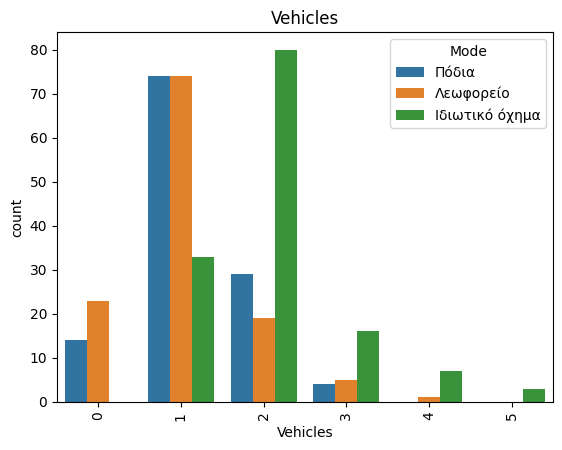

In [15]:
sns.countplot(x='Vehicles', data=df, hue='Mode')
plt.title('Vehicles')
plt.xticks(rotation=90)
plt.show()

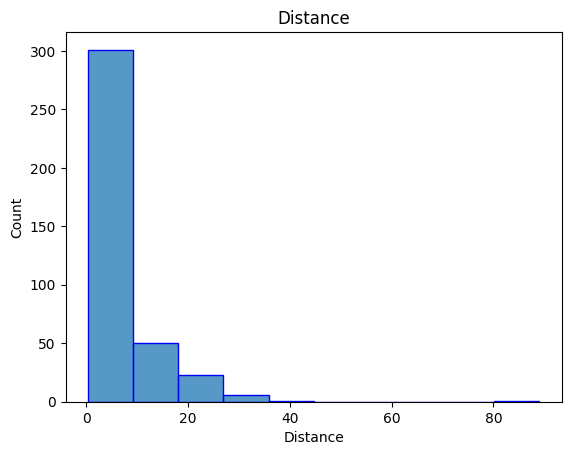

In [16]:
sns.histplot(df['Distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

In [17]:
df = df[(df['Distance'] <= 80)]
df.shape

(381, 22)

In [18]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,...,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,...,60,09.00 - 12.00,1,3,2,4,5,3,4,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,40,06.00 - 09.00,4,4,4,2,2,2,3,7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,35,06.00 - 09.00,4,5,3,2,1,4,2,6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,...,6,06.00 - 09.00,5,3,3,3,3,5,3,0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,...,46,06.00 - 09.00,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,...,18,12.00 - 15.00,5,3,5,3,3,3,5,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,...,60,09.00 - 12.00,3,5,3,5,3,3,3,9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,...,44,06.00 - 09.00,4,3,3,4,5,5,3,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,...,18,12.00 - 15.00,4,5,3,4,3,3,3,2.20


In [19]:
# Create a geolocator instance with a unique user agent
geolocator = Nominatim(user_agent="MyGeocodingApp_Marios_Melachroinos_v212324252627")


# Function to get coordinates for an address
def get_coordinates(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Function to calculate distance between home and work coordinates
def calculate_distance(row):
    home_coords = get_coordinates(row['Home_address'])
    work_coords = get_coordinates(row['Work_address'])
    
    if home_coords and work_coords:
        return geodesic(home_coords, work_coords).kilometers
    else:
        return None

# Apply the calculate_distance function to each row in the DataFrame
df['Geodesic_distance'] = df.apply(calculate_distance, axis=1)

In [20]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,NaN
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.835484
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.680253
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


In [21]:
df['Geodesic_distance'].fillna(df['Distance'], inplace=True)

In [22]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,0.350000
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.835484
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.680253
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


In [23]:
drops = [
        'Home_address','Work_address']
df = df.drop(drops, axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 382
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Age                381 non-null    object 
 2   Driver_licence     381 non-null    object 
 3   Motor_licence      381 non-null    object 
 4   Bike               381 non-null    object 
 5   Skate              381 non-null    object 
 6   Hsize              381 non-null    int64  
 7   Vehicles           381 non-null    int64  
 8   Income             381 non-null    object 
 9   Mode               381 non-null    object 
 10  Time               381 non-null    int64  
 11  Depart_time        381 non-null    object 
 12  Convenience        381 non-null    int64  
 13  Cost               381 non-null    int64  
 14  Safety             381 non-null    int64  
 15  Environment        381 non-null    int64  
 16  Health             381 non-null

In [25]:
df.duplicated().sum()

0

In [26]:
df

,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,500 - 1000,Λεωφορείο,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,500 - 1000,Λεωφορείο,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,0 - 500,Λεωφορείο,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,500 - 1000,Ιδιωτικό όχημα,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,0.350000
4,Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,500 - 1000,Ιδιωτικό όχημα,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,1000 - 1500,Ιδιωτικό όχημα,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,500 - 1000,Λεωφορείο,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.835484
380,Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,500 - 1000,Πόδια,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.680253
381,Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,500 - 1000,Λεωφορείο,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


In [27]:
df1 = df.copy()

# EDA

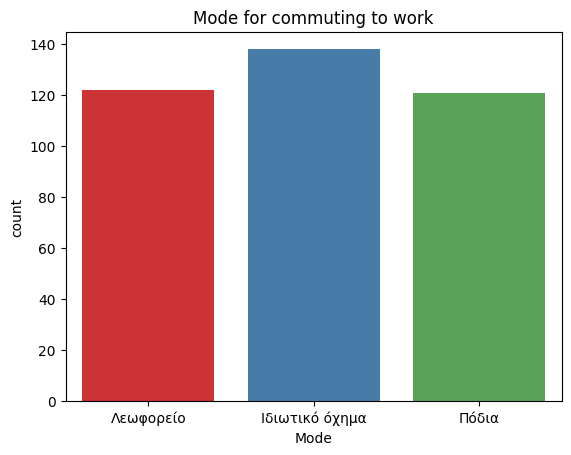

In [28]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.title('Mode for commuting to work')
plt.show()

In [29]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
Ιδιωτικό όχημα    36.220472
Λεωφορείο         32.020997
Πόδια             31.758530
Name: proportion, dtype: float64


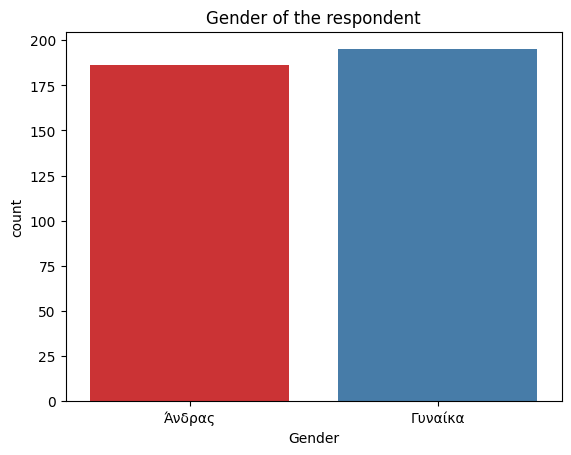

In [30]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title('Gender of the respondent')
plt.show()

In [31]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Γυναίκα    51.181102
Άνδρας     48.818898
Name: proportion, dtype: float64


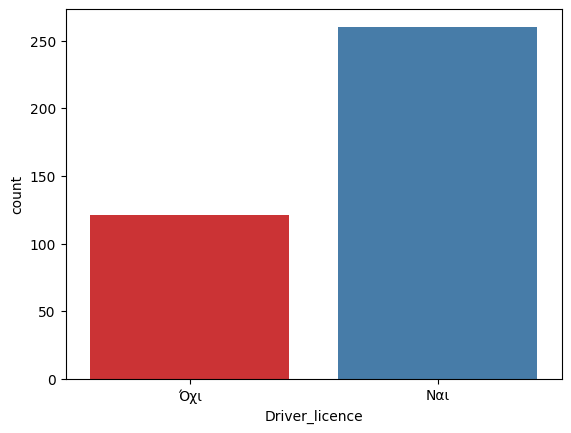

In [32]:
sns.countplot(x='Driver_licence', data=df, palette='Set1')
plt.show()

In [33]:
perc=df['Driver_licence'].value_counts(True)*100
print(perc)

Driver_licence
Ναι    68.24147
Όχι    31.75853
Name: proportion, dtype: float64


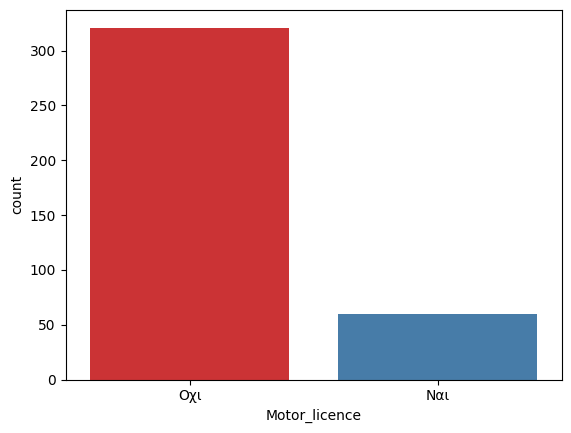

In [34]:
sns.countplot(x='Motor_licence', data=df, palette='Set1')
plt.show()

In [35]:
perc=df['Motor_licence'].value_counts(True)*100
print(perc)

Motor_licence
Οχι    84.251969
Ναι    15.748031
Name: proportion, dtype: float64


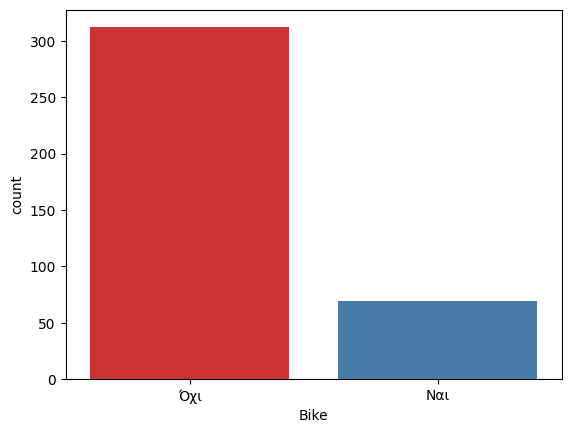

In [36]:
sns.countplot(x='Bike', data=df, palette='Set1')
plt.show()

In [37]:
perc=df['Bike'].value_counts(True)*100
print(perc)

Bike
Όχι    81.889764
Ναι    18.110236
Name: proportion, dtype: float64


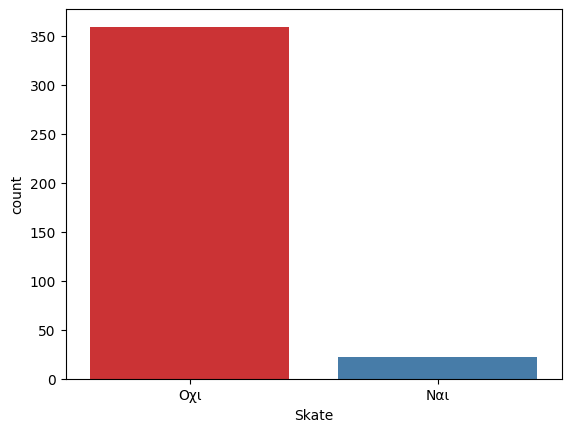

In [38]:
sns.countplot(x='Skate', data=df, palette='Set1')
plt.show()

In [39]:
perc=df['Skate'].value_counts(True)*100
print(perc)

Skate
Οχι    94.225722
Ναι     5.774278
Name: proportion, dtype: float64


In [40]:
order_time = ["06.00 - 09.00", "09.00 - 12.00", "12.00 - 15.00", "15.00 - 18.00", "18.00 - 21.00", "00.00 - 03.00", "03.00 - 06.00"]

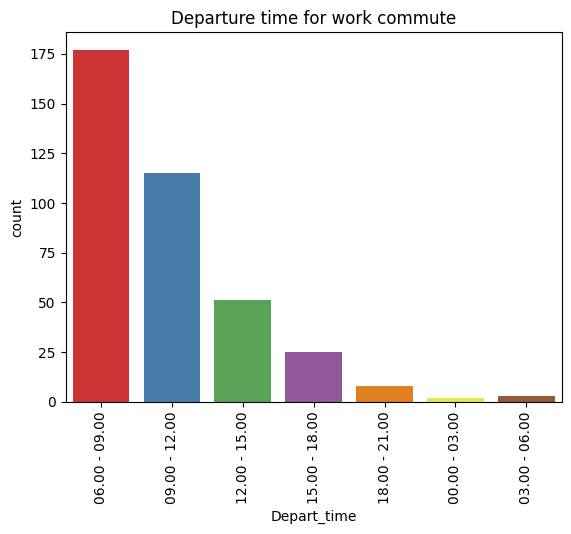

In [41]:
sns.countplot(x='Depart_time', data=df, order=order_time, palette='Set1')
plt.xticks(rotation=90)
plt.title('Departure time for work commute')
plt.show()

In [42]:
perc=df['Depart_time'].value_counts(True)*100
print(perc)

Depart_time
06.00 - 09.00    46.456693
09.00 - 12.00    30.183727
12.00 - 15.00    13.385827
15.00 - 18.00     6.561680
18.00 - 21.00     2.099738
03.00 - 06.00     0.787402
00.00 - 03.00     0.524934
Name: proportion, dtype: float64


In [43]:
order_income = ["0 - 500", "500 - 1000", "1000 - 1500", "1500 - 2000", "2000 και άνω"]

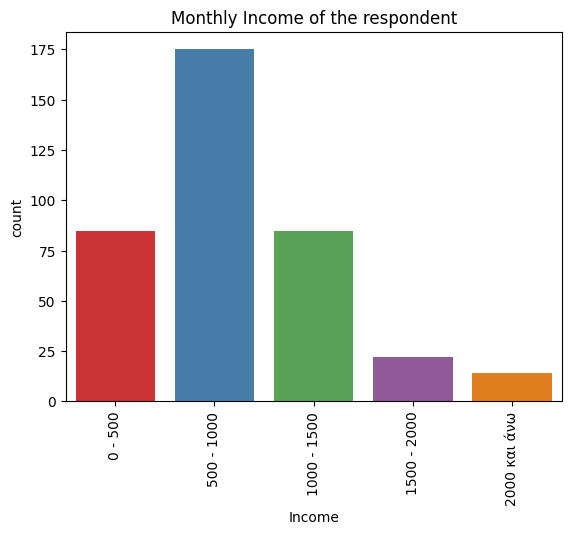

In [44]:
sns.countplot(x='Income', data=df, palette='Set1', order=order_income)
plt.xticks(rotation=90)
plt.title('Monthly Income of the respondent')
plt.show()

In [45]:
perc=df['Income'].value_counts(True)*100
print(perc)

Income
500 - 1000      45.931759
0 - 500         22.309711
1000 - 1500     22.309711
1500 - 2000      5.774278
2000 και άνω     3.674541
Name: proportion, dtype: float64


In [46]:
df1['Convenience'] = df1['Convenience'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

In [47]:
order_likert = ["Totally disagree", "Disagree", "Neutral", "Agree", "Totally agree"]

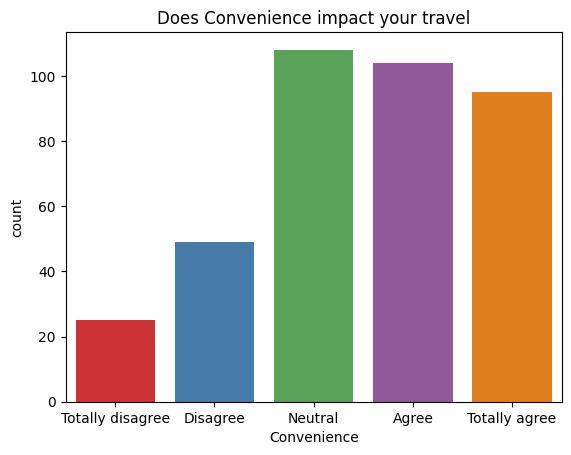

In [48]:
sns.countplot(x='Convenience', data=df1,  palette='Set1', order=order_likert)
plt.title('Does Convenience impact your travel')
plt.xticks()
plt.show()

In [49]:
perc=df1['Convenience'].value_counts(True)*100
print(perc)

Convenience
Neutral             28.346457
Agree               27.296588
Totally agree       24.934383
Disagree            12.860892
Totally disagree     6.561680
Name: proportion, dtype: float64


In [50]:
df1['Cost'] = df1['Cost'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

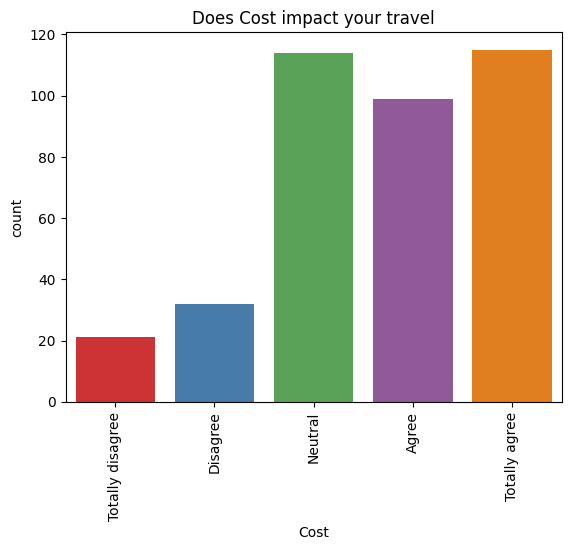

In [51]:
sns.countplot(x='Cost', data=df1, order = order_likert, palette='Set1')
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

In [52]:
perc=df1['Cost'].value_counts(True)*100
print(perc)

Cost
Totally agree       30.183727
Neutral             29.921260
Agree               25.984252
Disagree             8.398950
Totally disagree     5.511811
Name: proportion, dtype: float64


In [53]:
df1['Health'] = df1['Health'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

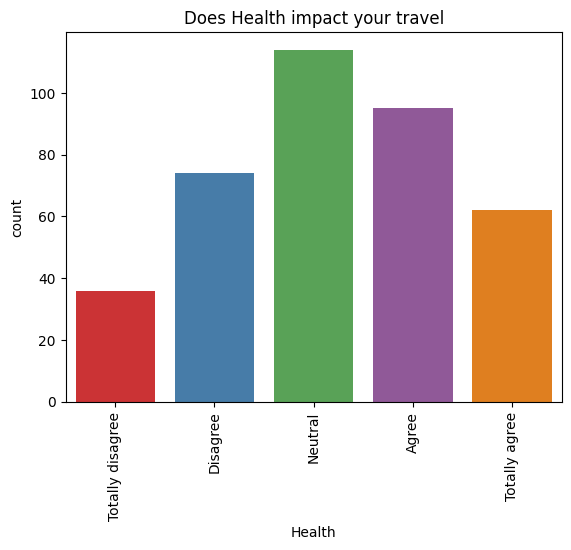

In [54]:
sns.countplot(x='Health', data=df1, order=order_likert, palette='Set1')
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

In [55]:
perc=df1['Health'].value_counts(True)*100
print(perc)

Health
Neutral             29.921260
Agree               24.934383
Disagree            19.422572
Totally agree       16.272966
Totally disagree     9.448819
Name: proportion, dtype: float64


In [56]:
df1['Safety'] = df1['Safety'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

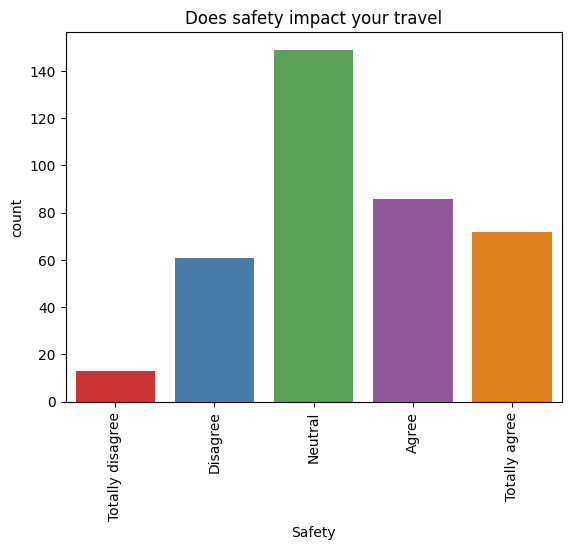

In [57]:
sns.countplot(x='Safety', data=df1, order=order_likert, palette='Set1')
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

In [58]:
perc=df1['Safety'].value_counts(True)*100
print(perc)

Safety
Neutral             39.107612
Agree               22.572178
Totally agree       18.897638
Disagree            16.010499
Totally disagree     3.412073
Name: proportion, dtype: float64


In [59]:
df1['Environment'] = df1['Environment'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

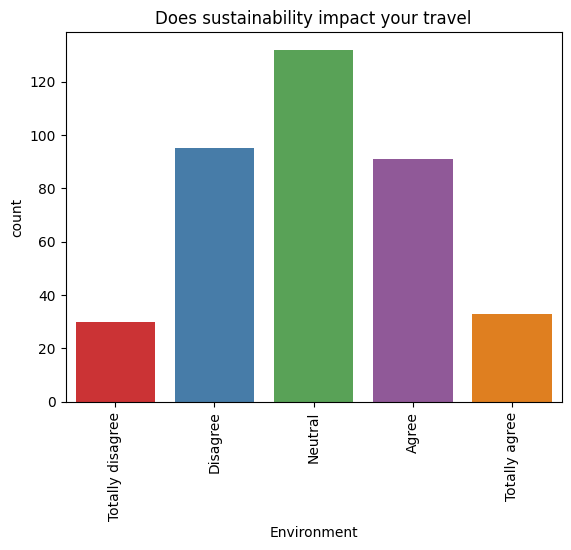

In [60]:
sns.countplot(x='Environment', data=df1, order=order_likert, palette='Set1')
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [61]:
perc=df1['Environment'].value_counts(True)*100
print(perc)

Environment
Neutral             34.645669
Disagree            24.934383
Agree               23.884514
Totally agree        8.661417
Totally disagree     7.874016
Name: proportion, dtype: float64


In [62]:
df1['Parking'] = df1['Parking'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

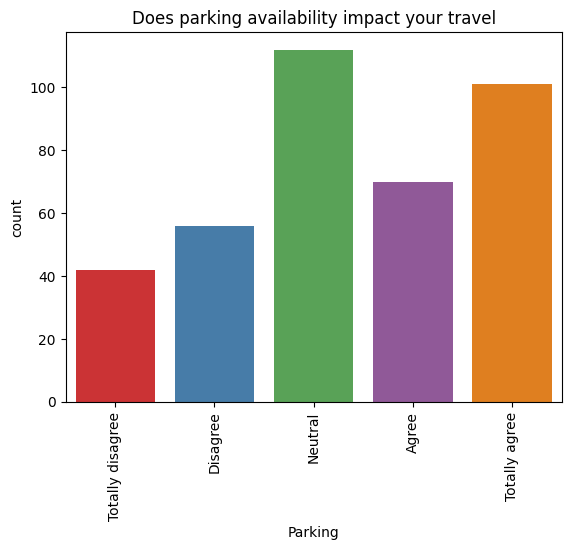

In [63]:
sns.countplot(x='Parking', data=df1, order=order_likert, palette='Set1')
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [64]:
perc=df1['Parking'].value_counts(True)*100
print(perc)

Parking
Neutral             29.396325
Totally agree       26.509186
Agree               18.372703
Disagree            14.698163
Totally disagree    11.023622
Name: proportion, dtype: float64


In [65]:
df1['Weather'] = df1['Weather'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

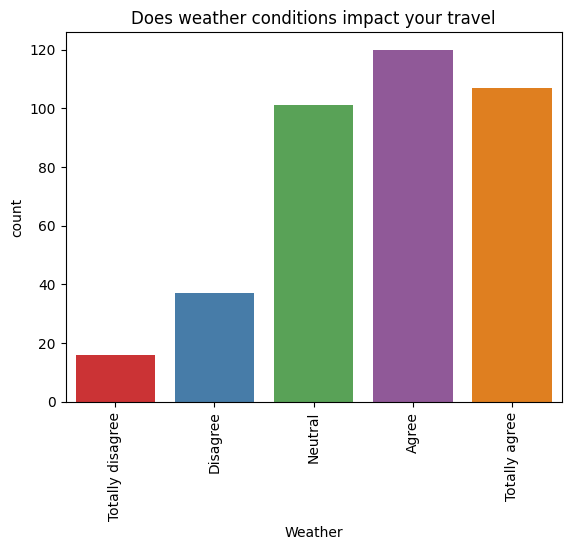

In [66]:
sns.countplot(x='Weather', data=df1, order=order_likert, palette='Set1')
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

In [67]:
perc=df1['Weather'].value_counts(True)*100
print(perc)

Weather
Agree               31.496063
Totally agree       28.083990
Neutral             26.509186
Disagree             9.711286
Totally disagree     4.199475
Name: proportion, dtype: float64


In [68]:
order_age = ["20 και κάτω", "21 - 30", "31 -40", "41 - 50", "51 - 60", "61 και άνω"]

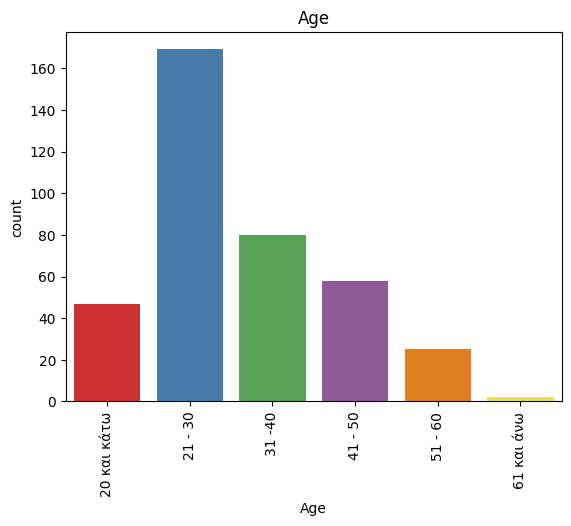

In [69]:
sns.countplot(x='Age', data=df, order = order_age, palette='Set1')
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

In [70]:
perc=df['Age'].value_counts(True)*100
print(perc)

Age
21 - 30        44.356955
31 -40         20.997375
41 - 50        15.223097
20 και κάτω    12.335958
51 - 60         6.561680
61 και άνω      0.524934
Name: proportion, dtype: float64


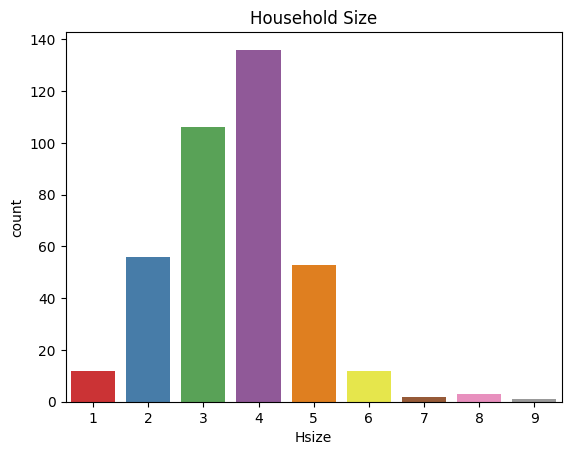

In [71]:
sns.countplot(x='Hsize', data=df, palette='Set1')
plt.title('Household Size')
plt.show()

In [72]:
perc=df['Hsize'].value_counts(True)*100
print(perc)

Hsize
4    35.695538
3    27.821522
2    14.698163
5    13.910761
1     3.149606
6     3.149606
8     0.787402
7     0.524934
9     0.262467
Name: proportion, dtype: float64


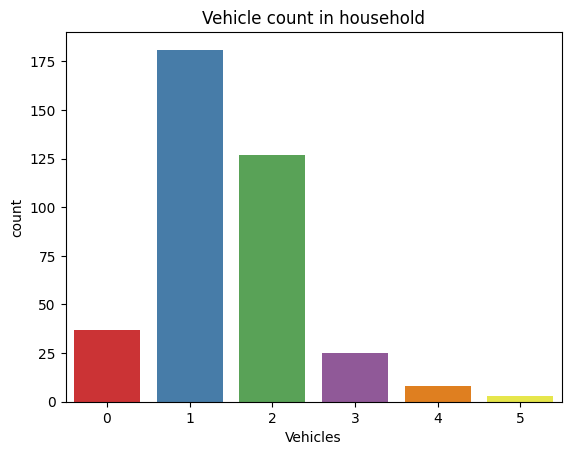

In [73]:
sns.countplot(x='Vehicles', data=df, palette='Set1')
plt.title('Vehicle count in household')
plt.show()

In [74]:
perc=df['Vehicles'].value_counts(True)*100
print(perc)

Vehicles
1    47.506562
2    33.333333
0     9.711286
3     6.561680
4     2.099738
5     0.787402
Name: proportion, dtype: float64


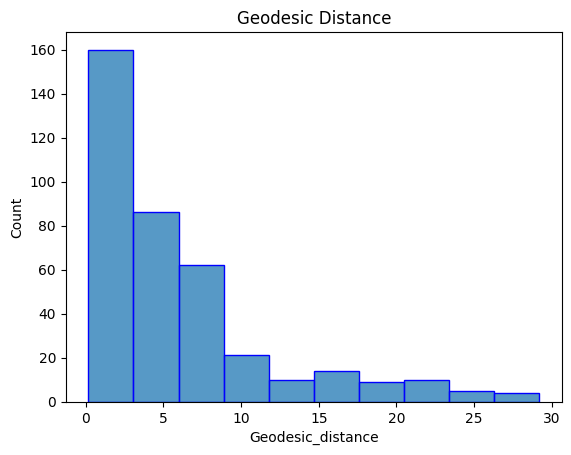

In [75]:
sns.histplot(df['Geodesic_distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Geodesic Distance')
plt.show()

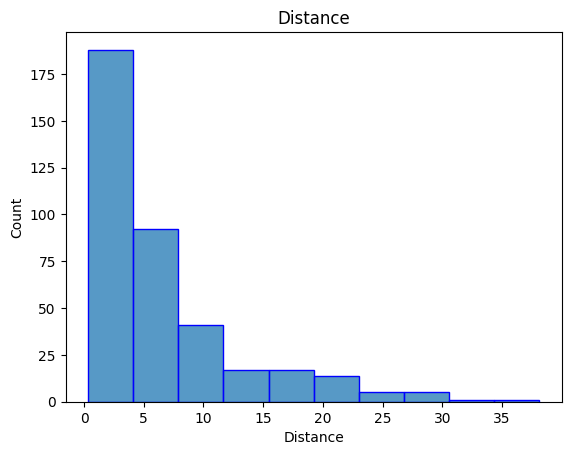

In [76]:
sns.histplot(df['Distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

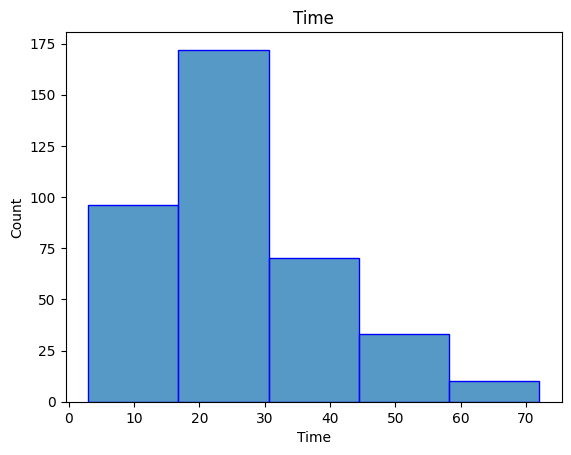

In [77]:
sns.histplot(df['Time'], bins=5, edgecolor='blue')
plt.ylabel('Count')
plt.title('Time')
plt.show()

In [78]:
df.describe()

,Hsize,Vehicles,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3.595801,1.461942,25.784777,3.511811,3.669291,3.375328,3.005249,3.191601,3.695538,3.346457,6.484252,5.979346
std,1.222329,0.892510,13.304169,1.184546,1.152036,1.067866,1.073594,1.199795,1.105825,1.310150,6.519153,6.025900
min,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.350000,0.159077
25%,3.000000,1.000000,16.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.900000,1.738704
50%,4.000000,1.000000,23.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.300000,4.109669
75%,4.000000,2.000000,34.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,8.100000,7.410076
max,9.000000,5.000000,72.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,38.100000,29.200000


In [79]:
df.shape

(381, 21)

# Συνδυαστικα Γραφήματα

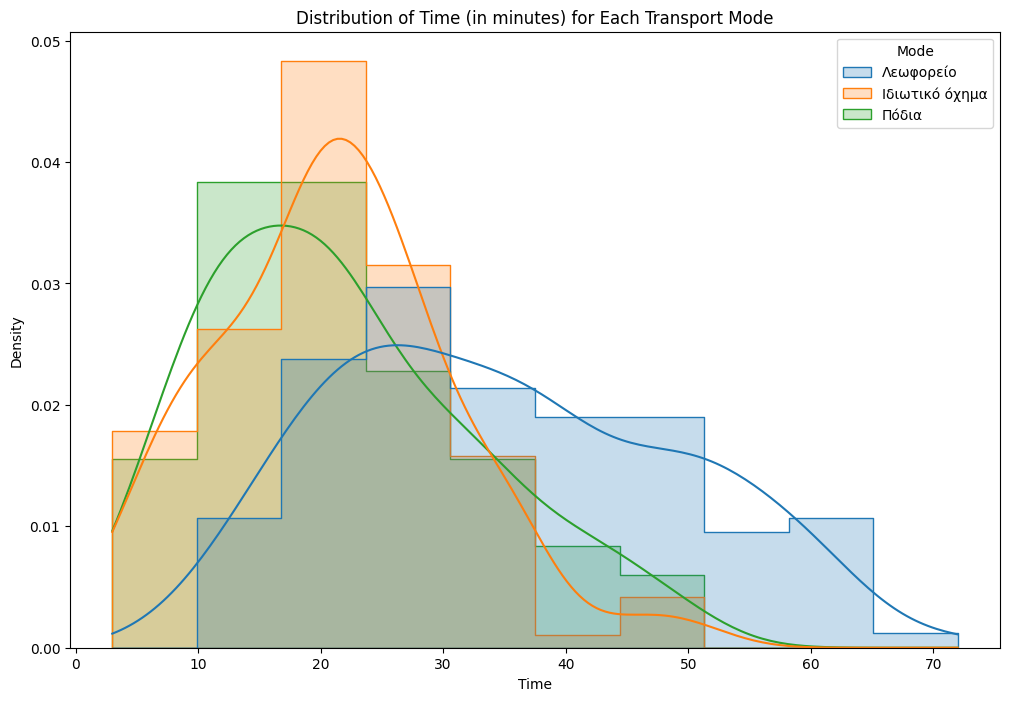

In [80]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Time', hue='Mode', bins=10, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Time (in minutes) for Each Transport Mode')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

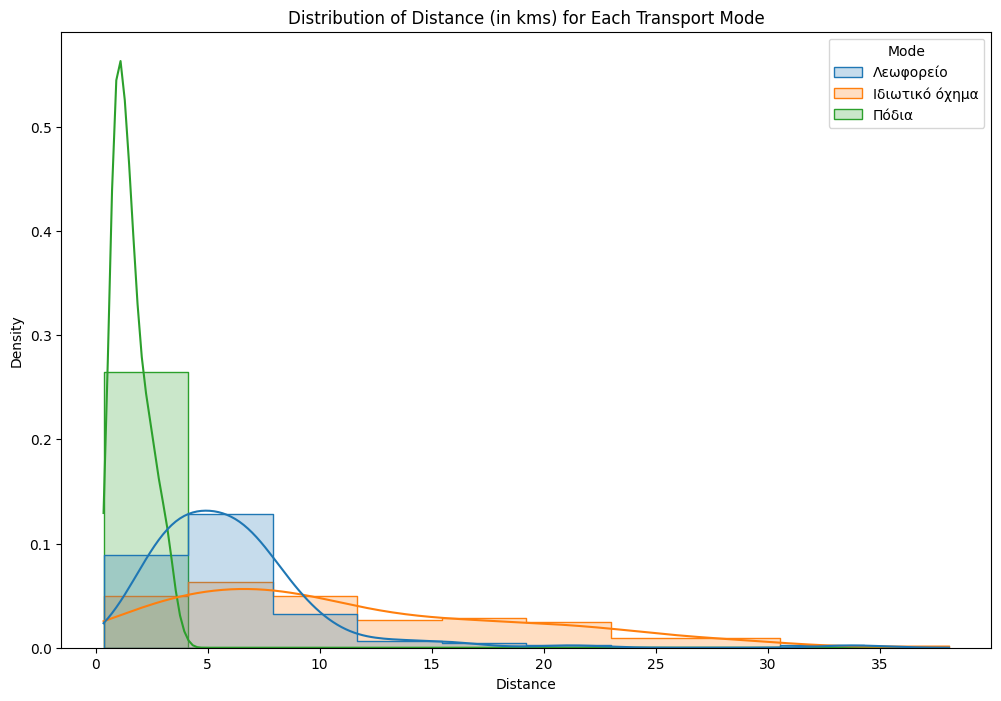

In [83]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Distance', hue='Mode', bins=10, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Distance (in kms) for Each Transport Mode')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()

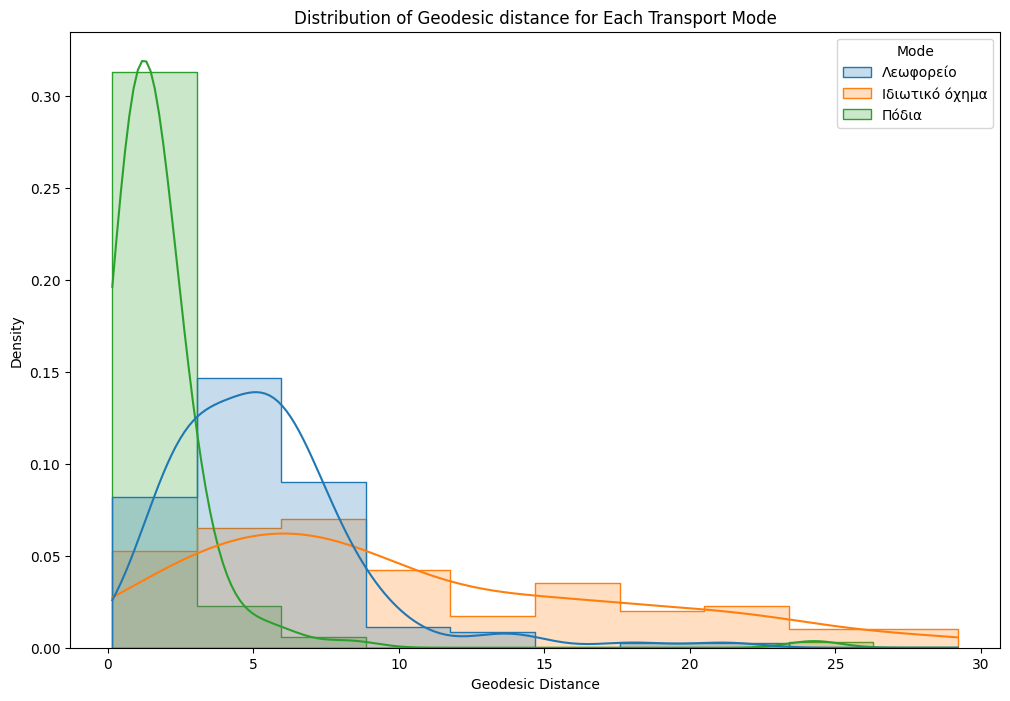

In [84]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Geodesic_distance', hue='Mode', bins=10, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Geodesic distance for Each Transport Mode')
plt.xlabel('Geodesic Distance')
plt.ylabel('Density')
plt.show()

In [85]:
mode_colors = {'Ιδιωτικό όχημα': 'blue', 'Λεωφορείο': 'orange', 'Πόδια': 'green'}

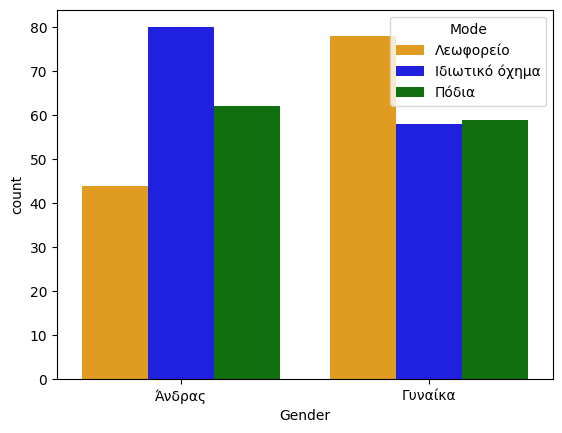

In [86]:
sns.countplot(x='Gender', data=df,hue='Mode', palette=mode_colors)
plt.show()

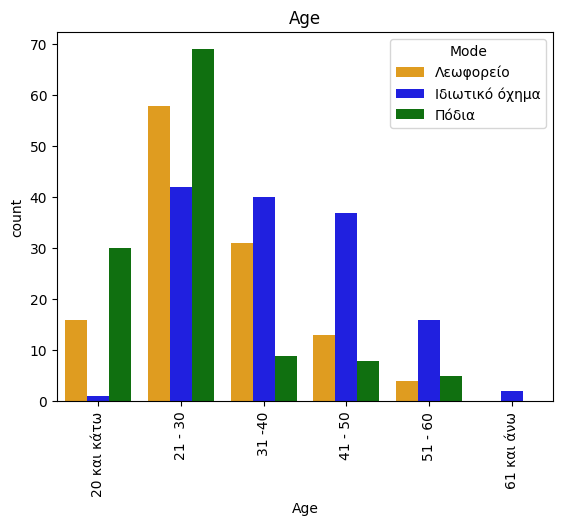

In [87]:
sns.countplot(x='Age', data=df, order = order_age, hue='Mode', palette=mode_colors)
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

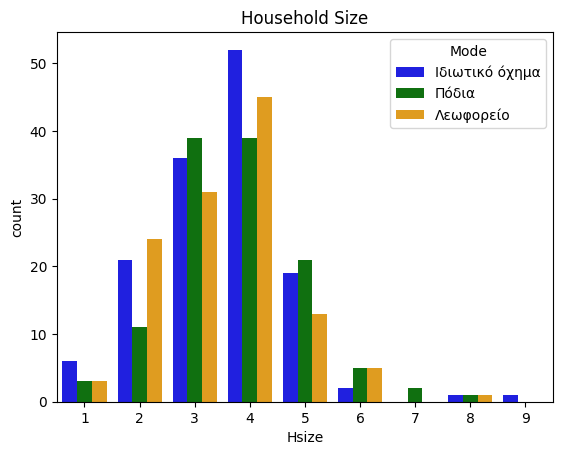

In [88]:
sns.countplot(x='Hsize', data=df, hue='Mode', palette=mode_colors)
plt.title('Household Size')
plt.show()

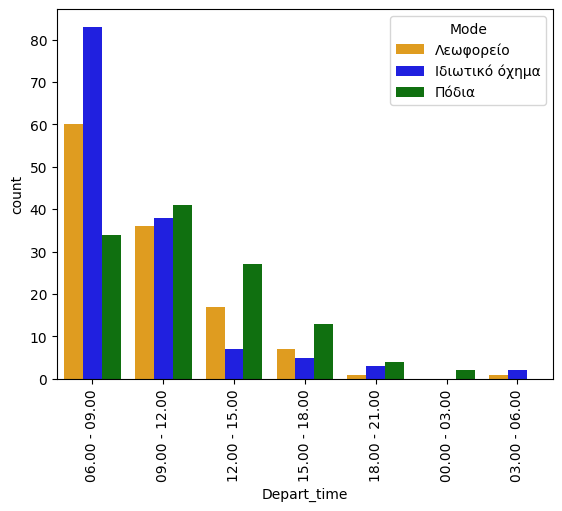

In [89]:
sns.countplot(x='Depart_time', data=df, order=order_time, hue='Mode', palette=mode_colors)
plt.xticks(rotation=90)
plt.show()

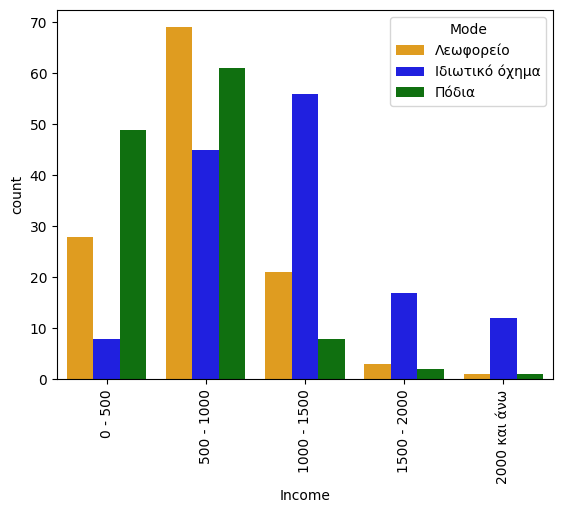

In [90]:
sns.countplot(x='Income', data=df, order=order_income, hue='Mode', palette=mode_colors)
plt.xticks(rotation=90)
plt.show()

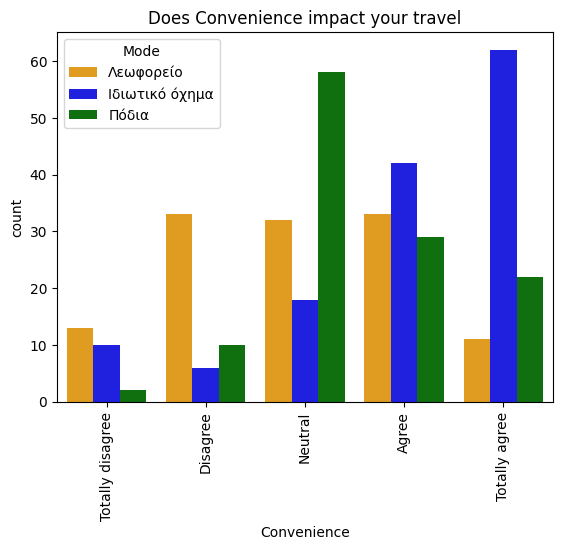

In [91]:
sns.countplot(x='Convenience', data=df1, order = order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Convenience impact your travel')
plt.xticks(rotation=90)
plt.show()

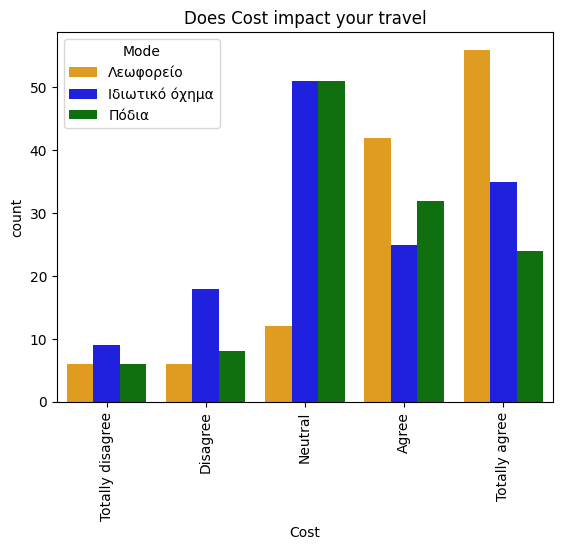

In [92]:
sns.countplot(x='Cost', data=df1, order = order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

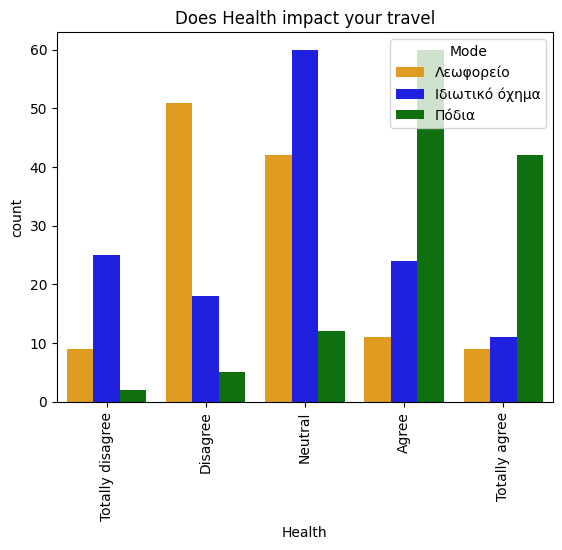

In [93]:
sns.countplot(x='Health', data=df1, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

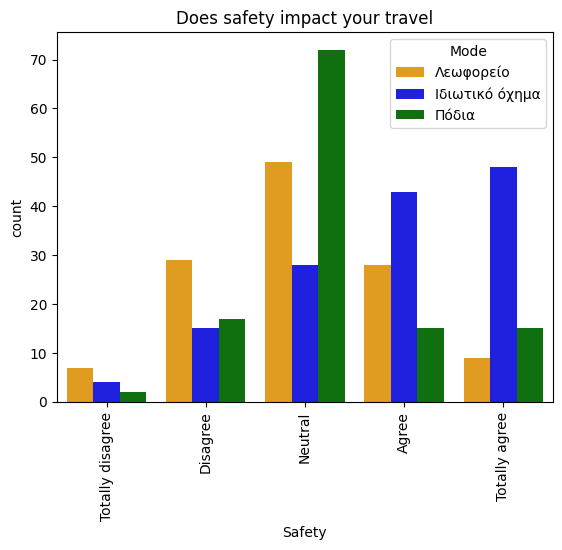

In [94]:
sns.countplot(x='Safety', data=df1, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

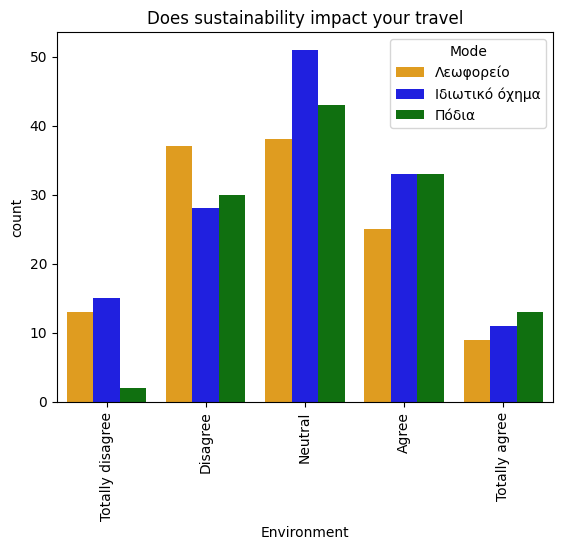

In [95]:
sns.countplot(x='Environment', data=df1, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

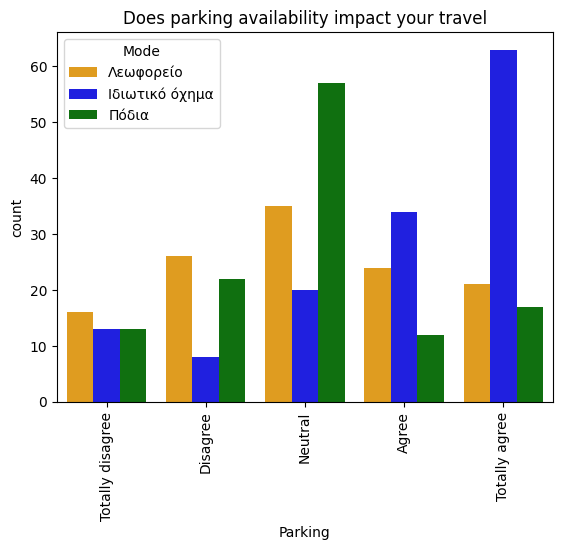

In [96]:
sns.countplot(x='Parking', data=df1, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

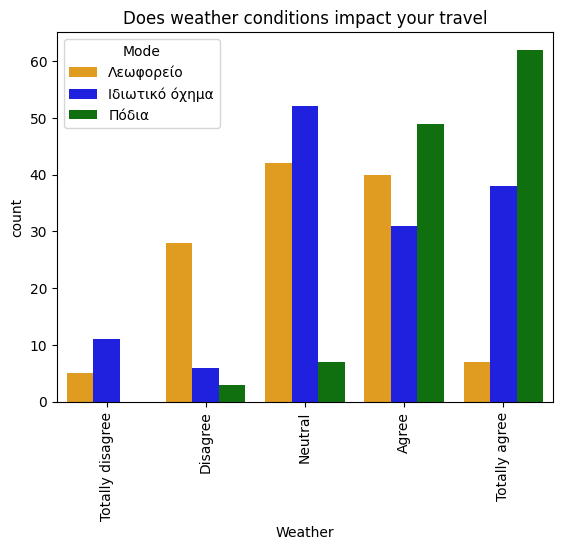

In [97]:
sns.countplot(x='Weather', data=df1, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

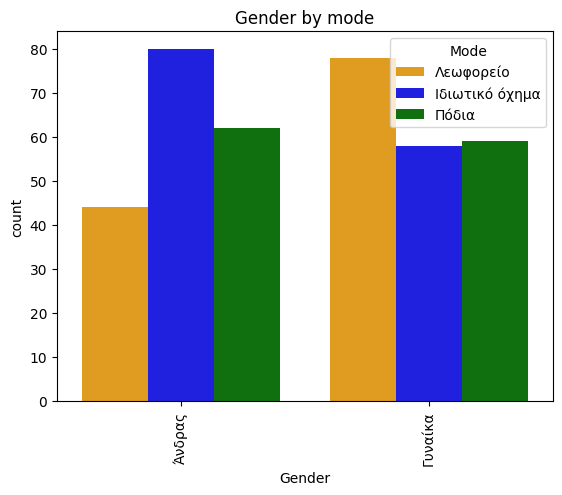

In [98]:
sns.countplot(x='Gender', data=df1, hue='Mode', palette=mode_colors)
plt.title('Gender by mode')
plt.xticks(rotation=90)
plt.show()

# PREPROCESS

In [99]:
df1

,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,4,3,500 - 1000,Λεωφορείο,...,09.00 - 12.00,Totally disagree,Neutral,Disagree,Agree,Totally agree,Neutral,Agree,8.00,7.157182
1,Άνδρας,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,500 - 1000,Λεωφορείο,...,06.00 - 09.00,Agree,Agree,Agree,Disagree,Disagree,Disagree,Neutral,7.60,13.814558
2,Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,1,0 - 500,Λεωφορείο,...,06.00 - 09.00,Agree,Totally agree,Neutral,Disagree,Totally disagree,Agree,Disagree,6.60,6.063515
3,Γυναίκα,21 - 30,Ναι,Ναι,Όχι,Οχι,4,4,500 - 1000,Ιδιωτικό όχημα,...,06.00 - 09.00,Totally agree,Neutral,Neutral,Neutral,Neutral,Totally agree,Neutral,0.35,0.350000
4,Άνδρας,21 - 30,Ναι,Οχι,Όχι,Οχι,3,2,500 - 1000,Ιδιωτικό όχημα,...,06.00 - 09.00,Totally agree,Totally agree,Totally agree,Disagree,Neutral,Totally agree,Totally agree,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Άνδρας,31 -40,Ναι,Ναι,Όχι,Οχι,4,2,1000 - 1500,Ιδιωτικό όχημα,...,12.00 - 15.00,Totally agree,Neutral,Totally agree,Neutral,Neutral,Neutral,Totally agree,8.60,7.410076
379,Γυναίκα,41 - 50,Ναι,Οχι,Όχι,Οχι,1,0,500 - 1000,Λεωφορείο,...,09.00 - 12.00,Neutral,Totally agree,Neutral,Totally agree,Neutral,Neutral,Neutral,9.70,8.835484
380,Άνδρας,21 - 30,Ναι,Οχι,Ναι,Ναι,3,1,500 - 1000,Πόδια,...,06.00 - 09.00,Agree,Neutral,Neutral,Agree,Totally agree,Totally agree,Neutral,3.20,2.680253
381,Γυναίκα,21 - 30,Όχι,Οχι,Όχι,Οχι,3,0,500 - 1000,Λεωφορείο,...,12.00 - 15.00,Agree,Totally agree,Neutral,Agree,Neutral,Neutral,Neutral,2.20,1.869763


We will check the correlation matrix on the copy dataframe

In [100]:
df1.columns

Index(['Gender', 'Age', 'Driver_licence', 'Motor_licence', 'Bike', 'Skate',
       'Hsize', 'Vehicles', 'Income', 'Mode', 'Time', 'Depart_time',
       'Convenience', 'Cost', 'Safety', 'Environment', 'Health', 'Weather',
       'Parking', 'Distance', 'Geodesic_distance'],
      dtype='object')

In [101]:
le=LabelEncoder()
features=["Gender", "Age", 'Driver_licence', 'Motor_licence', 'Bike', 'Skate','Income', 'Mode', 'Depart_time',
       'Convenience', 'Cost', 'Safety', 'Environment', 'Health', 'Weather',
       'Parking']
for col in features:
    df1[col]=le.fit_transform(df1[col])

In [102]:
df1

,Gender,Age,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,0,1,0,1,0,1,4,3,4,1,...,3,4,2,1,0,3,2,0,8.00,7.157182
1,0,1,0,1,0,1,3,1,4,1,...,2,0,0,0,1,1,1,2,7.60,13.814558
2,1,1,0,1,0,1,3,1,0,1,...,2,0,3,2,1,4,0,1,6.60,6.063515
3,1,1,1,0,0,1,4,4,4,0,...,2,3,2,2,2,2,3,2,0.35,0.350000
4,0,1,1,1,0,1,3,2,4,0,...,2,3,3,3,1,2,3,3,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,2,1,0,0,1,4,2,1,0,...,4,3,2,3,2,2,2,3,8.60,7.410076
379,1,3,1,1,0,1,1,0,4,1,...,3,2,3,2,3,2,2,2,9.70,8.835484
380,0,1,1,1,1,0,3,1,4,2,...,2,0,2,2,0,3,3,2,3.20,2.680253
381,1,1,0,1,0,1,3,0,4,1,...,4,0,3,2,0,2,2,2,2.20,1.869763


In [106]:
drops = ['Mode']
X = df1.drop(drops, axis=1)

<Axes: >

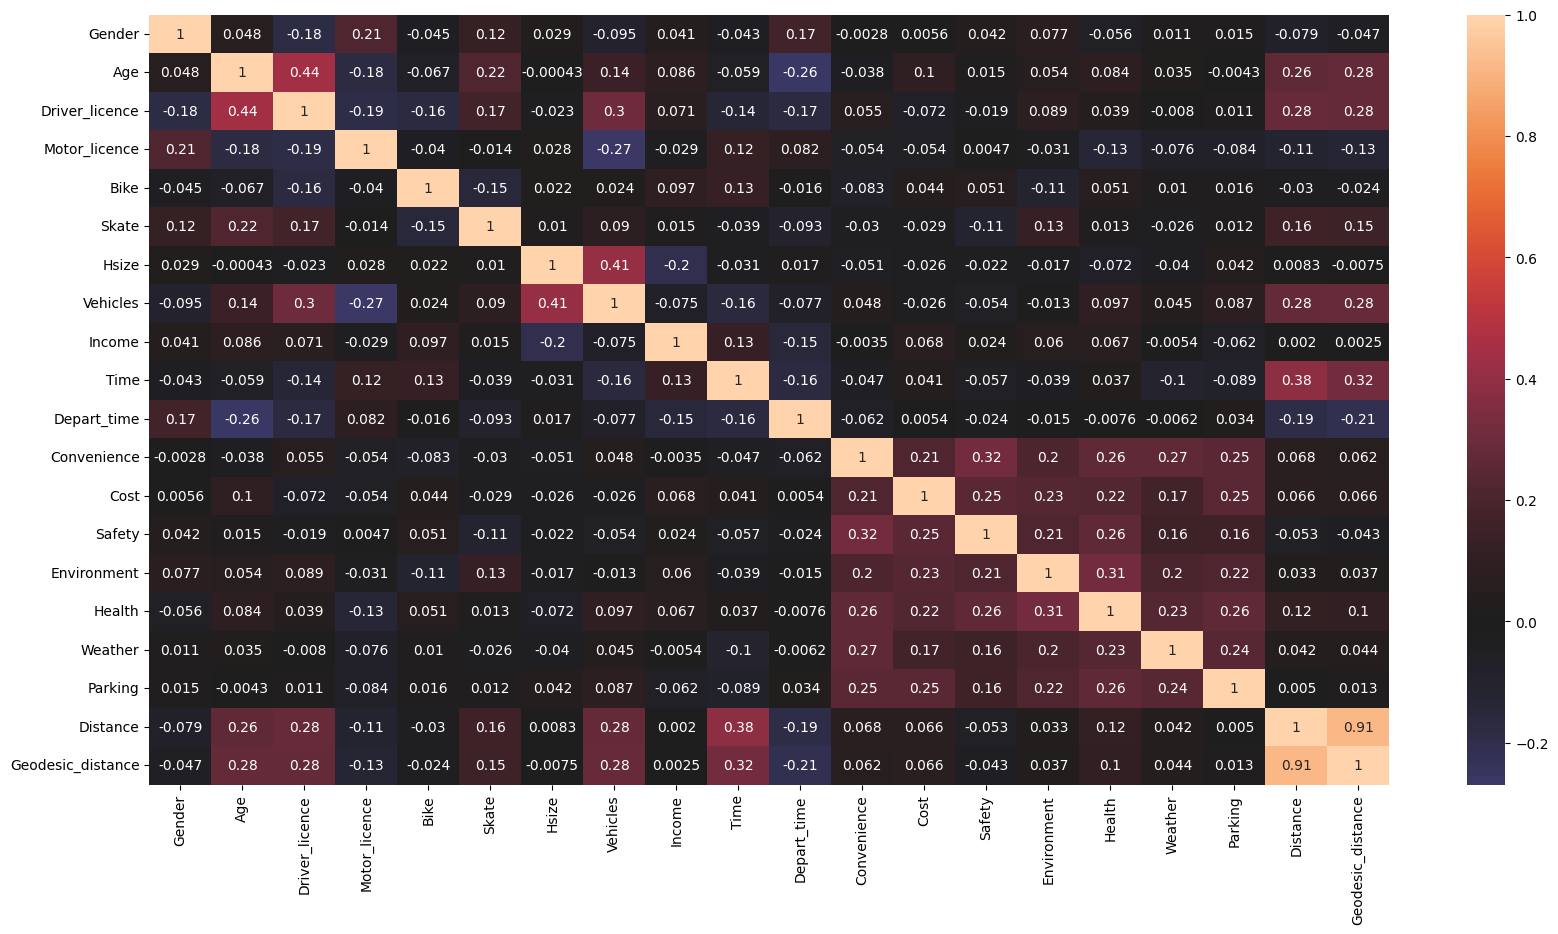

In [107]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [109]:
value_mapping = {"51 - 60":'51 και ανω', "61 και άνω":'51 και ανω'}
df['Age'] = df['Age'].replace(value_mapping)

In [110]:
perc=df['Age'].value_counts(True)*100
print(perc)

Age
21 - 30        44.356955
31 -40         20.997375
41 - 50        15.223097
20 και κάτω    12.335958
51 και ανω      7.086614
Name: proportion, dtype: float64


In [111]:
df.shape

(381, 21)

In [112]:
value_mapping = {"15.00 - 18.00":'Other', "18.00 - 21.00":'Other', "03.00 - 06.00":"Other", "00.00 - 03.00":"Other"}
df['Depart_time'] = df['Depart_time'].replace(value_mapping)

In [113]:
perc=df['Depart_time'].value_counts(True)*100
print(perc)

Depart_time
06.00 - 09.00    46.456693
09.00 - 12.00    30.183727
12.00 - 15.00    13.385827
Other             9.973753
Name: proportion, dtype: float64


In [114]:
value_mapping = {"1500 - 2000":'1500 και ανω', "2000 και άνω":"1500 και ανω"}
df['Income'] = df['Income'].replace(value_mapping)

In [115]:
perc=df['Income'].value_counts(True)*100
print(perc)

Income
500 - 1000      45.931759
0 - 500         22.309711
1000 - 1500     22.309711
1500 και ανω     9.448819
Name: proportion, dtype: float64


In [116]:
drops = ["Geodesic_distance", "Driver_licence", "Mode", "Vehicles", "Motor_licence"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [117]:
drops1 = ["Distance", "Driver_licence", "Mode", "Vehicles", "Motor_licence"]
X1 = df.drop(drops1, axis=1)
y1 = df["Mode"]

In [118]:
X, y = shuffle(X, y, random_state=42)

In [119]:
X1, y1 = shuffle(X1, y1, random_state=42)

We will process train and test sets seperately

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

# Train set

In [121]:
X_train

,Gender,Age,Bike,Skate,Hsize,Income,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
81,Άνδρας,51 και ανω,Όχι,Οχι,4,1000 - 1500,8,06.00 - 09.00,5,4,5,4,4,4,4,2.30
161,Άνδρας,51 και ανω,Όχι,Οχι,5,500 - 1000,23,06.00 - 09.00,5,3,2,2,2,1,2,6.30
64,Γυναίκα,21 - 30,Όχι,Οχι,3,500 - 1000,21,Other,3,1,2,3,1,3,1,2.30
253,Γυναίκα,20 και κάτω,Όχι,Οχι,3,0 - 500,12,12.00 - 15.00,3,3,3,4,4,5,1,0.85
231,Άνδρας,31 -40,Όχι,Οχι,2,500 - 1000,12,06.00 - 09.00,5,4,2,2,4,5,2,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,Άνδρας,21 - 30,Όχι,Οχι,4,1000 - 1500,37,06.00 - 09.00,3,4,3,4,4,5,3,2.60
24,Γυναίκα,21 - 30,Όχι,Οχι,3,500 - 1000,5,Other,5,5,5,3,3,5,3,7.20
334,Άνδρας,21 - 30,Όχι,Οχι,4,500 - 1000,57,06.00 - 09.00,3,5,3,3,3,4,5,7.80
193,Γυναίκα,20 και κάτω,Όχι,Οχι,4,0 - 500,13,12.00 - 15.00,2,4,4,3,3,4,3,0.90


In [123]:
value_mapping = {"Όχι":0, "Ναι":1}
X_train['Bike'] = X_train['Bike'].replace(value_mapping)

In [124]:
value_mapping = {"Οχι":0, "Ναι":1}
X_train['Skate'] = X_train['Skate'].replace(value_mapping)

In [125]:
value_mapping = {"Άνδρας":0, "Γυναίκα":1}
X_train['Gender'] = X_train['Gender'].replace(value_mapping)

In [126]:
X_train

,Gender,Age,Bike,Skate,Hsize,Income,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
81,0,51 και ανω,0,0,4,1000 - 1500,8,06.00 - 09.00,5,4,5,4,4,4,4,2.30
161,0,51 και ανω,0,0,5,500 - 1000,23,06.00 - 09.00,5,3,2,2,2,1,2,6.30
64,1,21 - 30,0,0,3,500 - 1000,21,Other,3,1,2,3,1,3,1,2.30
253,1,20 και κάτω,0,0,3,0 - 500,12,12.00 - 15.00,3,3,3,4,4,5,1,0.85
231,0,31 -40,0,0,2,500 - 1000,12,06.00 - 09.00,5,4,2,2,4,5,2,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,21 - 30,0,0,4,1000 - 1500,37,06.00 - 09.00,3,4,3,4,4,5,3,2.60
24,1,21 - 30,0,0,3,500 - 1000,5,Other,5,5,5,3,3,5,3,7.20
334,0,21 - 30,0,0,4,500 - 1000,57,06.00 - 09.00,3,5,3,3,3,4,5,7.80
193,1,20 και κάτω,0,0,4,0 - 500,13,12.00 - 15.00,2,4,4,3,3,4,3,0.90


In [127]:
one_hot_encoded = pd.get_dummies(X_train[['Age', 'Income', 'Depart_time']])
one_hot_encoded = one_hot_encoded.astype(int)
X_train = pd.concat([X_train, one_hot_encoded], axis=1)
X_train

,Gender,Age,Bike,Skate,Hsize,Income,Time,Depart_time,Convenience,Cost,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
81,0,51 και ανω,0,0,4,1000 - 1500,8,06.00 - 09.00,5,4,...,0,1,0,1,0,0,1,0,0,0
161,0,51 και ανω,0,0,5,500 - 1000,23,06.00 - 09.00,5,3,...,0,1,0,0,0,1,1,0,0,0
64,1,21 - 30,0,0,3,500 - 1000,21,Other,3,1,...,0,0,0,0,0,1,0,0,0,1
253,1,20 και κάτω,0,0,3,0 - 500,12,12.00 - 15.00,3,3,...,0,0,1,0,0,0,0,0,1,0
231,0,31 -40,0,0,2,500 - 1000,12,06.00 - 09.00,5,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,21 - 30,0,0,4,1000 - 1500,37,06.00 - 09.00,3,4,...,0,0,0,1,0,0,1,0,0,0
24,1,21 - 30,0,0,3,500 - 1000,5,Other,5,5,...,0,0,0,0,0,1,0,0,0,1
334,0,21 - 30,0,0,4,500 - 1000,57,06.00 - 09.00,3,5,...,0,0,0,0,0,1,1,0,0,0
193,1,20 και κάτω,0,0,4,0 - 500,13,12.00 - 15.00,2,4,...,0,0,1,0,0,0,0,0,1,0


In [128]:
drops = ['Age', 'Income', 'Depart_time']
X_train = X_train.drop(drops, axis=1)
X_train.head(5)

,Gender,Bike,Skate,Hsize,Time,Convenience,Cost,Safety,Environment,Health,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
81,0,0,0,4,8,5,4,5,4,4,...,0,1,0,1,0,0,1,0,0,0
161,0,0,0,5,23,5,3,2,2,2,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,3,21,3,1,2,3,1,...,0,0,0,0,0,1,0,0,0,1
253,1,0,0,3,12,3,3,3,4,4,...,0,0,1,0,0,0,0,0,1,0
231,0,0,0,2,12,5,4,2,2,4,...,0,0,0,0,0,1,1,0,0,0


In [129]:
value_mapping = {"Ιδιωτικό όχημα":0, "Λεωφορείο":1, "Πόδια":2}
y_train = y_train.replace(value_mapping)
y_train

81     0
161    0
64     1
253    2
231    2
      ..
350    2
24     0
334    1
193    2
99     1
Name: Mode, Length: 228, dtype: int64

In [130]:
X_train.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και ανω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

# Test set

In [131]:
value_mapping = {"Όχι":0, "Ναι":1}
X_test['Bike'] = X_test['Bike'].replace(value_mapping)

In [132]:
value_mapping = {"Οχι":0, "Ναι":1}
X_test['Skate'] = X_test['Skate'].replace(value_mapping)

In [133]:
value_mapping = {"Άνδρας":0, "Γυναίκα":1}
X_test['Gender'] = X_test['Gender'].replace(value_mapping)

In [134]:
one_hot_encoded = pd.get_dummies(X_test[['Age', 'Income', 'Depart_time']])
one_hot_encoded = one_hot_encoded.astype(int)
X_test = pd.concat([X_test, one_hot_encoded], axis=1)
X_test

,Gender,Age,Bike,Skate,Hsize,Income,Time,Depart_time,Convenience,Cost,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
308,0,21 - 30,0,0,3,500 - 1000,35,12.00 - 15.00,3,4,...,0,0,0,0,0,1,0,0,1,0
181,1,51 και ανω,0,0,1,500 - 1000,27,06.00 - 09.00,1,1,...,0,1,0,0,0,1,1,0,0,0
144,0,41 - 50,0,0,6,1000 - 1500,8,09.00 - 12.00,4,4,...,1,0,0,1,0,0,0,1,0,0
143,1,21 - 30,1,0,4,0 - 500,28,12.00 - 15.00,4,4,...,0,0,1,0,0,0,0,0,1,0
184,1,21 - 30,0,0,3,500 - 1000,33,06.00 - 09.00,3,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,41 - 50,0,0,3,1000 - 1500,30,06.00 - 09.00,4,4,...,1,0,0,1,0,0,1,0,0,0
313,0,21 - 30,0,0,3,0 - 500,23,09.00 - 12.00,3,4,...,0,0,1,0,0,0,0,1,0,0
120,0,51 και ανω,1,0,6,1500 και ανω,7,06.00 - 09.00,3,3,...,0,1,0,0,1,0,1,0,0,0
130,0,41 - 50,0,0,4,1000 - 1500,22,06.00 - 09.00,5,3,...,1,0,0,1,0,0,1,0,0,0


In [135]:
drops = ['Age', 'Income', 'Depart_time']
X_test = X_test.drop(drops, axis=1)
X_test.head(5)

,Gender,Bike,Skate,Hsize,Time,Convenience,Cost,Safety,Environment,Health,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
308,0,0,0,3,35,3,4,3,3,5,...,0,0,0,0,0,1,0,0,1,0
181,1,0,0,1,27,1,1,3,3,4,...,0,1,0,0,0,1,1,0,0,0
144,0,0,0,6,8,4,4,4,4,4,...,1,0,0,1,0,0,0,1,0,0
143,1,1,0,4,28,4,4,4,4,4,...,0,0,1,0,0,0,0,0,1,0
184,1,0,0,3,33,3,4,3,2,4,...,0,0,0,0,0,1,1,0,0,0


In [136]:
value_mapping = {"Ιδιωτικό όχημα":0, "Λεωφορείο":1, "Πόδια":2}
y_test = y_test.replace(value_mapping)
y_test

308    2
181    0
144    0
143    1
184    2
      ..
345    1
313    2
120    2
130    0
203    2
Name: Mode, Length: 153, dtype: int64

In [137]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((228, 26), (228,), (153, 26), (153,))

In [138]:
train_set = pd.concat([X_train, y_train], axis=1)
train_set.to_csv('train_set.csv', index=False)
test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv('test_set.csv', index=False)

In [139]:
train_set.shape, test_set.shape

((228, 27), (153, 27))

# Repeat process for geodesic distance

In [140]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state =42, stratify=y1)

In [141]:
value_mapping = {"Όχι":0, "Ναι":1}
X1_train['Bike'] = X1_train['Bike'].replace(value_mapping)

In [142]:
value_mapping = {"Οχι":0, "Ναι":1}
X1_train['Skate'] = X1_train['Skate'].replace(value_mapping)

In [143]:
value_mapping = {"Άνδρας":0, "Γυναίκα":1}
X1_train['Gender'] = X1_train['Gender'].replace(value_mapping)

In [144]:
one_hot_encoded = pd.get_dummies(X1_train[['Age', 'Income', 'Depart_time']])
one_hot_encoded = one_hot_encoded.astype(int)
X1_train = pd.concat([X1_train, one_hot_encoded], axis=1)

In [145]:
drops = ['Age', 'Income', 'Depart_time']
X1_train = X1_train.drop(drops, axis=1)
X1_train.head(5)

,Gender,Bike,Skate,Hsize,Time,Convenience,Cost,Safety,Environment,Health,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
81,0,0,0,4,8,5,4,5,4,4,...,0,1,0,1,0,0,1,0,0,0
161,0,0,0,5,23,5,3,2,2,2,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,3,21,3,1,2,3,1,...,0,0,0,0,0,1,0,0,0,1
253,1,0,0,3,12,3,3,3,4,4,...,0,0,1,0,0,0,0,0,1,0
231,0,0,0,2,12,5,4,2,2,4,...,0,0,0,0,0,1,1,0,0,0


In [146]:
value_mapping = {"Ιδιωτικό όχημα":0, "Λεωφορείο":1, "Πόδια":2}
y1_train = y1_train.replace(value_mapping)
y1_train

81     0
161    0
64     1
253    2
231    2
      ..
350    2
24     0
334    1
193    2
99     1
Name: Mode, Length: 228, dtype: int64

test set

In [147]:
value_mapping = {"Όχι":0, "Ναι":1}
X1_test['Bike'] = X1_test['Bike'].replace(value_mapping)

In [148]:
value_mapping = {"Οχι":0, "Ναι":1}
X1_test['Skate'] = X1_test['Skate'].replace(value_mapping)

In [149]:
value_mapping = {"Άνδρας":0, "Γυναίκα":1}
X1_test['Gender'] = X1_test['Gender'].replace(value_mapping)

In [150]:
one_hot_encoded = pd.get_dummies(X1_test[['Age', 'Income', 'Depart_time']])
one_hot_encoded = one_hot_encoded.astype(int)
X1_test = pd.concat([X1_test, one_hot_encoded], axis=1)

In [151]:
drops = ['Age', 'Income', 'Depart_time']
X1_test = X1_test.drop(drops, axis=1)
X1_test.head(5)

,Gender,Bike,Skate,Hsize,Time,Convenience,Cost,Safety,Environment,Health,...,Age_41 - 50,Age_51 και ανω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
308,0,0,0,3,35,3,4,3,3,5,...,0,0,0,0,0,1,0,0,1,0
181,1,0,0,1,27,1,1,3,3,4,...,0,1,0,0,0,1,1,0,0,0
144,0,0,0,6,8,4,4,4,4,4,...,1,0,0,1,0,0,0,1,0,0
143,1,1,0,4,28,4,4,4,4,4,...,0,0,1,0,0,0,0,0,1,0
184,1,0,0,3,33,3,4,3,2,4,...,0,0,0,0,0,1,1,0,0,0


In [152]:
value_mapping = {"Ιδιωτικό όχημα":0, "Λεωφορείο":1, "Πόδια":2}
y1_test = y1_test.replace(value_mapping)
y1_test

308    2
181    0
144    0
143    1
184    2
      ..
345    1
313    2
120    2
130    0
203    2
Name: Mode, Length: 153, dtype: int64

In [153]:
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((228, 26), (228,), (153, 26), (153,))

In [154]:
train_set_geo = pd.concat([X1_train, y1_train], axis=1)
train_set_geo.to_csv('train_setgeo.csv', index=False)
test_set_geo = pd.concat([X1_test, y1_test], axis=1)
test_set_geo.to_csv('test_setgeo.csv', index=False)